<a href="https://colab.research.google.com/github/rdial127/FreeThrowsCode/blob/main/Copy_of_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 2 (Fradulent Job Postings)

In [ ]:
#Necessary Imports for Data Cleaning and Analysis
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
drive_dir = '/content/drive/Shareddrives/MATH 2327 3439 - Data/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Description
This dataset contains listing information for legitimate and fradulent job postings from a variety of industrys. With the job market increasingly shifting online, this dataset offers a wealth of information capable of building machine learning models (MLM).



### Dataset Context and Purpose
With job hunting becoming an increasingly online activity, it's more important than ever to remain cognizant of fake job postings. This dataset thus allows analysts and researchers employed by popular online job markets create models using text data and key traits/features to predict real versus fake job descriptions.

### Content
Included in this section are brief descriptions of the columns included in the dataset
* **location** - geographical location of the job ad.
* **department** - coporate department (i.e. sales)
* **salary_range** - indicative salary range (e.g. \$50,000 - \$60,000)
* **company_profile** - brief company description
* **description** - details description of the job ad
* **requirements** - enlished requirements for the job opening
* **benefits** - enlishted offered benefits by the employer
* **telecommuting** - true (1) for telecommuting positions
* **has_company_logo** - true (1) is company logo is present
* **has_questions** - true (1) if screening questions are present
* **employment_type** - full-time, part-time, contract, etc.
* **required_experience** - executive, entry level, intern, etc.
* **requred_education** - doctorate, masters, bachelor's degree, etc.
* **industry** - automotive, IT, health care, real estate, etc.
* **function** - consulting, engineering, research, sales, etc.
* **fradulent** - target-classification attribute. (~800 [4.47%] listings in this dataset are fake)

##Questions about the Data
The following questions will help team members gain an understanding of the dataset, identify common characteristics of fradulent listings, and build a predictive model with the goal of providing more context to the question, "how can we spot a fake job description?"


####Familarizing Ourselves with the Dataset:
* What are the most common department, salary range, employment type, industry, and function of the dataset? Does this different between legitmate and fradulent listings?
* Where are real and fake job listings coming from? (location and company)
* What is landscape of benefits, required experience, required education, and other "additional" details within the dataset? How does this compare across real and fake listings?


####Building a Predictive Model
* Which input columns fit our data the best in predicting the legitimacy of job listings?

## Data Cleaning/Modification

This section will detail the various data cleaning and modification tasks undertaken by team members. As you will soon see, we were dealing with primarily textual data, which required us to become creative in how we quanitified aspects of our data for use in our learning model.

### Data Inspection/Cleaning

In [ ]:
job_desc_df = pd.read_csv('/content/drive/Shareddrives/Project 2/Copy of cleaned_fake_job_postings.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
job_desc_df.head()

,Unnamed: 0,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,...,Standardized_Department_Media & Communications.1,Standardized_Department_Not Provided.1,Standardized_Department_Operations.1,Standardized_Department_Product Management & Development.1,Standardized_Department_Project Management.1,Standardized_Department_Quality Assurance & Testing.1,Standardized_Department_Research & Development.1,Standardized_Department_Retail & Consumer.1,Standardized_Department_Sales.1,Standardized_Department_Technology.1
0,0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Not Provided,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Not Provided,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Not Provided,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,5,Bill Review Manager,"US, FL, Fort Worth",Not Provided,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
(job_desc_df.isna().sum() / len(job_desc_df)) * 100

,0
Unnamed: 0,0.000000
job_id,0.000000
title,0.000000
location,1.935123
department,0.000000
...,...
Standardized_Department_Quality Assurance & Testing.1,0.000000
Standardized_Department_Research & Development.1,0.000000
Standardized_Department_Retail & Consumer.1,0.000000
Standardized_Department_Sales.1,0.000000


For missing values, such as `salary_range`, `company_profile`, `requirements`, `employment_type`, `required_experience`, `required_education`, `industry`, and `function`, values that represent missing information will be substitued for NaN.

This is done with the impression that several of these columns will be used in training and testing our model, so simply dropping NaN values is not in our best interest

#### `department` Column

In [ ]:
#Changing `Nan` values and other values indicating a lack of information with the 'Not Provided' string
job_desc_df['department'] = job_desc_df['department'].replace(['Unknown', 'nan', '...', '0', ' '], np.nan)
job_desc_df['department'] = job_desc_df['department'].fillna('Not Provided')

#Sanity Check
assert job_desc_df['department'].isna().sum() == 0, 'NaN values in `department` column'

#### `company_profile` Column

In [ ]:
#Changing `NaN` values with the 'Not Provided' string
job_desc_df['company_profile'] = job_desc_df['company_profile'].fillna('Not Provided')

#Sanity Check
assert job_desc_df['company_profile'].isna().sum() == 0, 'NaN values in `company_profile` column'

#### `Salary_Range` Column (Before Deep Clean)

In [ ]:
def is_valid_salary(salary_range):
    """Returns True if the salary range is valid (not a date or non-numeric value)."""
    if pd.isna(salary_range):
        return False

    # Remove commas and check if the range follows the pattern 'number-number'
    salary_range_clean = salary_range.replace(",", "")
    match = re.match(r"^\d+-\d+$", salary_range_clean)  # Ensures both values are numbers

    return bool(match)

# Apply filtering
job_desc_df = job_desc_df[job_desc_df["salary_range"].apply(is_valid_salary)]

# Display sample valid salary ranges
job_desc_df["salary_range"].dropna().head(10)

,salary_range
6,20000-28000
10,100000-120000
15,120000-150000
23,100000-120000
31,50000-65000
42,40000-50000
65,60-80
76,65000-70000
77,75-115
79,75000-110000


In [ ]:
def clean_salary_range(salary):
    """Categorizes salary ranges into Annual and Hourly."""
    if pd.isna(salary):
        return None

    match = re.match(r"(\d+)-(\d+)", str(salary))
    if match:
        low, high = map(int, match.groups())

        if high >= 10_000:
            return f"Annual: {low}-{high}"
        elif high < 500:
            return f"Hourly: {low}-{high}"

    return "Unknown"

# Apply function
job_desc_df["salary_cleaned"] = job_desc_df["salary_range"].apply(clean_salary_range)

# Display sample results
job_desc_df[["salary_range", "salary_cleaned"]].dropna().head(10)

,salary_range,salary_cleaned
6,20000-28000,Annual: 20000-28000
10,100000-120000,Annual: 100000-120000
15,120000-150000,Annual: 120000-150000
23,100000-120000,Annual: 100000-120000
31,50000-65000,Annual: 50000-65000
42,40000-50000,Annual: 40000-50000
65,60-80,Hourly: 60-80
76,65000-70000,Annual: 65000-70000
77,75-115,Hourly: 75-115
79,75000-110000,Annual: 75000-110000


In [ ]:
# Save the cleaned dataset
cleaned_file_path = "/content/drive/Shareddrives/Project 2/cleaned_fake_job_postings.csv"
job_desc_df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved to: {cleaned_file_path}")

Cleaned dataset saved to: /content/drive/Shareddrives/Project 2/cleaned_fake_job_postings.csv


####'Salary_Range' Column Cleaned (Spotting and Eliminating Fake Values)

In [ ]:
# Define reasonable salary thresholds
MIN_ANNUAL_SALARY = 10_000  # Below this is unrealistic for full-time jobs
MAX_ANNUAL_SALARY = 500_000  # Beyond this, it's likely a fake posting

MIN_HOURLY_WAGE = 10  # Below this is below minimum wage in most countries
MAX_HOURLY_WAGE = 300  # Above this is suspicious for general job postings

# Assuming job_desc_df has a 'salary_cleaned' column
# and we want to split it into annual and hourly DataFrames

# Create annual_salaries and hourly_salaries DataFrames
annual_salaries = job_desc_df[job_desc_df["salary_cleaned"].str.startswith("Annual", na=False)].copy()
hourly_salaries = job_desc_df[job_desc_df["salary_cleaned"].str.startswith("Hourly", na=False)].copy()

# Extract salary_high for filtering
annual_salaries['salary_high'] = annual_salaries['salary_cleaned'].str.extract(r'Annual: (\d+)-(\d+)').iloc[:, 1].astype(float)
hourly_salaries['salary_high'] = hourly_salaries['salary_cleaned'].str.extract(r'Hourly: (\d+)-(\d+)').iloc[:, 1].astype(float)

# Now filter based on salary thresholds
annual_salaries = annual_salaries[(annual_salaries["salary_high"] >= MIN_ANNUAL_SALARY) &
                                  (annual_salaries["salary_high"] <= MAX_ANNUAL_SALARY)]

hourly_salaries = hourly_salaries[(hourly_salaries["salary_high"] >= MIN_HOURLY_WAGE) &
                                  (hourly_salaries["salary_high"] <= MAX_HOURLY_WAGE)]

print("Cleaned Annual and Hourly Salary Ranges")

Cleaned Annual and Hourly Salary Ranges


In [ ]:
def is_standard_salary(salary_range):
    """Checks if salary range follows standard format (realistic difference)."""
    try:
        low, high = map(int, salary_range.replace(",", "").split("-"))
        if high < low or high / low > 10:  # If high is much larger than low, it's suspicious
            return False
        return True
    except:
        return False

# Apply filter to remove non-standard salaries
annual_salaries = annual_salaries[annual_salaries["salary_range"].apply(is_standard_salary)]
hourly_salaries = hourly_salaries[hourly_salaries["salary_range"].apply(is_standard_salary)]

print("Removed non-standard salary entries.")

Removed non-standard salary entries.


In [ ]:
# Remove job postings with missing salary info
job_desc_df = job_desc_df.dropna(subset=["salary_range"])

print(f"Remaining job postings: {len(job_desc_df)}")

Remaining job postings: 2841


In [ ]:
# Define industry-based expected salary ranges
expected_salary_ranges = {
    "Intern": (10_000, 40_000),
    "Entry Level": (30_000, 60_000),
    "Mid-Level": (50_000, 120_000),
    "Senior": (80_000, 250_000),
    "Executive": (100_000, 500_000),
}

def is_salary_reasonable(row):
    """Checks if the salary aligns with the expected range for the job title."""
    # Extract salary_high from salary_cleaned column
    match = re.search(r"(\d+)-(\d+)$", str(row["salary_cleaned"]))
    if match:
        salary_high = int(match.group(2))
    else:
        salary_high = np.nan  # Handle cases where salary_high cannot be extracted

    for level, (min_salary, max_salary) in expected_salary_ranges.items():
        if level.lower() in str(row["title"]).lower():
            if salary_high < min_salary or salary_high > max_salary:
                return False
    return True

# Apply filter
job_desc_df = job_desc_df[job_desc_df.apply(is_salary_reasonable, axis=1)]

print(f"Remaining job postings after salary benchmarking: {len(job_desc_df)}")

Remaining job postings after salary benchmarking: 2594


In [ ]:
salary_counts = job_desc_df["salary_range"].value_counts()
suspicious_salaries = salary_counts[salary_counts > 5]  # Flag salaries appearing >5 times

# Remove job postings using overly repeated salary values
job_desc_df = job_desc_df[~job_desc_df["salary_range"].isin(suspicious_salaries.index)]

print("Filtered out duplicate salary postings.")

Filtered out duplicate salary postings.


In [ ]:
job_desc_df.columns

Index(['Unnamed: 0', 'job_id', 'title', 'location', 'department',
       'salary_range', 'company_profile', 'description', 'requirements',
       'benefits',
       ...
       'Standardized_Department_Not Provided.1',
       'Standardized_Department_Operations.1',
       'Standardized_Department_Product Management & Development.1',
       'Standardized_Department_Project Management.1',
       'Standardized_Department_Quality Assurance & Testing.1',
       'Standardized_Department_Research & Development.1',
       'Standardized_Department_Retail & Consumer.1',
       'Standardized_Department_Sales.1',
       'Standardized_Department_Technology.1', 'salary_cleaned'],
      dtype='object', length=123)

####Visual Models for 'Salary_Range'

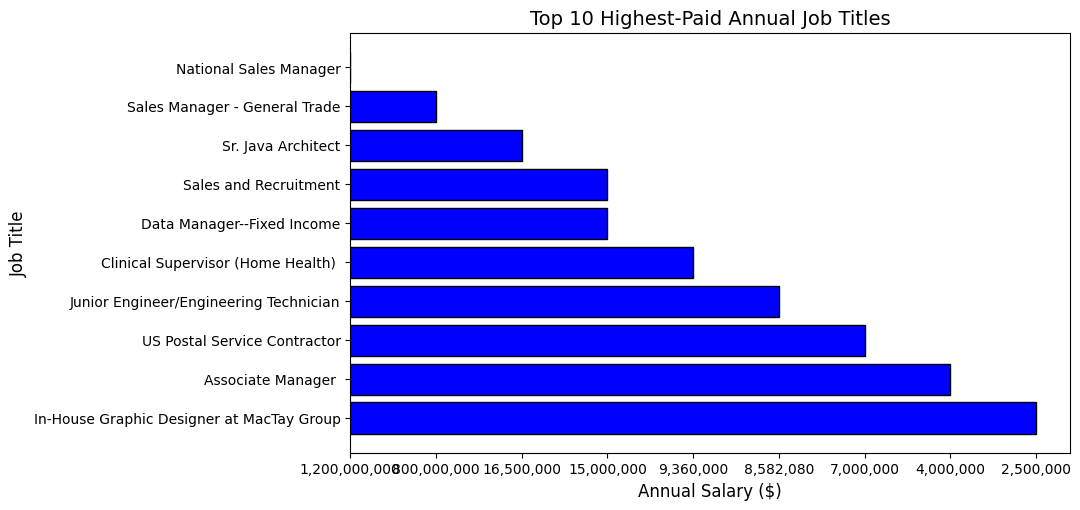

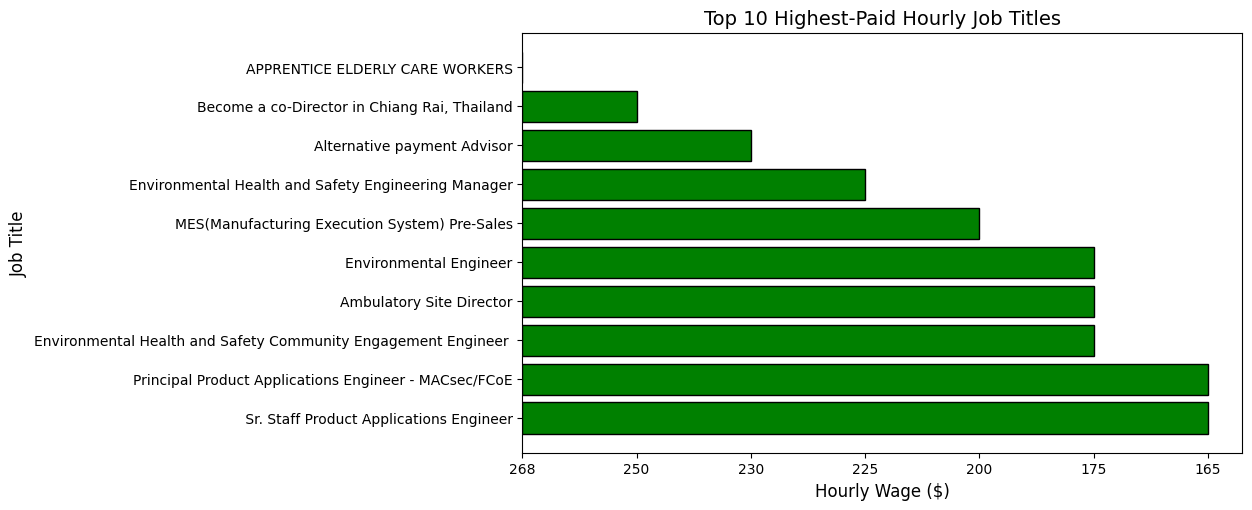

In [ ]:
import matplotlib.pyplot as plt

# Reload cleaned dataset
job_desc_df = pd.read_csv(cleaned_file_path)

# Extract top job titles with highest salaries
annual_salaries = job_desc_df[job_desc_df["salary_cleaned"].str.startswith("Annual", na=False)].copy()
hourly_salaries = job_desc_df[job_desc_df["salary_cleaned"].str.startswith("Hourly", na=False)].copy()

# Extract salary_high before converting to numeric
annual_salaries['salary_high'] = annual_salaries['salary_cleaned'].str.extract(r'Annual: (\d+)-(\d+)').iloc[:, 1].astype(float)
hourly_salaries['salary_high'] = hourly_salaries['salary_cleaned'].str.extract(r'Hourly: (\d+)-(\d+)').iloc[:, 1].astype(float)

# Convert salary_high to numeric
annual_salaries["salary_high"] = annual_salaries["salary_high"].astype(float)
hourly_salaries["salary_high"] = hourly_salaries["salary_high"].astype(float)

# Drop missing values before sorting
annual_salaries = annual_salaries.dropna(subset=["salary_high"]).sort_values(by="salary_high", ascending=False).head(10)
hourly_salaries = hourly_salaries.dropna(subset=["salary_high"]).sort_values(by="salary_high", ascending=False).head(10)

# Ensure job titles are properly formatted
annual_salaries["title"] = annual_salaries["title"].fillna("Unknown")
hourly_salaries["title"] = hourly_salaries["title"].fillna("Unknown")

# Format salaries with commas
def format_salary(salary):
    return f"{int(salary):,}" if pd.notna(salary) else None

annual_salaries["salary_high"] = annual_salaries["salary_high"].apply(format_salary)
hourly_salaries["salary_high"] = hourly_salaries["salary_high"].apply(format_salary)

# Adjust margins and spacing for better readability
def plot_salary_bars(data, title, color, x_label):
    plt.figure(figsize=(12, 6))
    plt.barh(data["title"], data["salary_high"], color=color, edgecolor="black")
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel("Job Title", fontsize=12)
    plt.title(title, fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.gca().invert_yaxis()
    plt.subplots_adjust(left=0.35, right=0.95, top=0.9, bottom=0.2)  # Adjust margins
    plt.show()

# Generate plots
plot_salary_bars(annual_salaries, "Top 10 Highest-Paid Annual Job Titles", "blue", "Annual Salary ($)")
plot_salary_bars(hourly_salaries, "Top 10 Highest-Paid Hourly Job Titles", "green", "Hourly Wage ($)")

Just as reference these graphs showcase our "salary outliers"(fake job postings) out of salary database

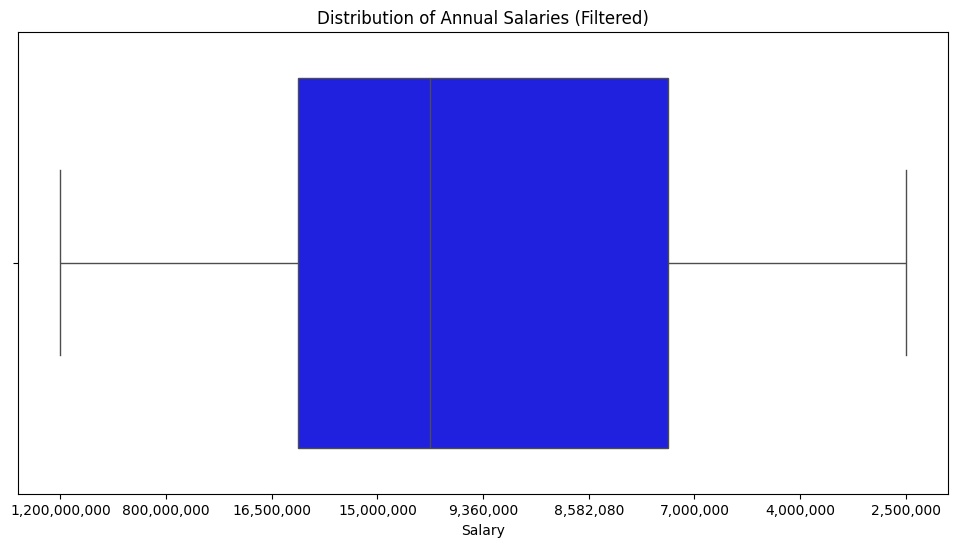

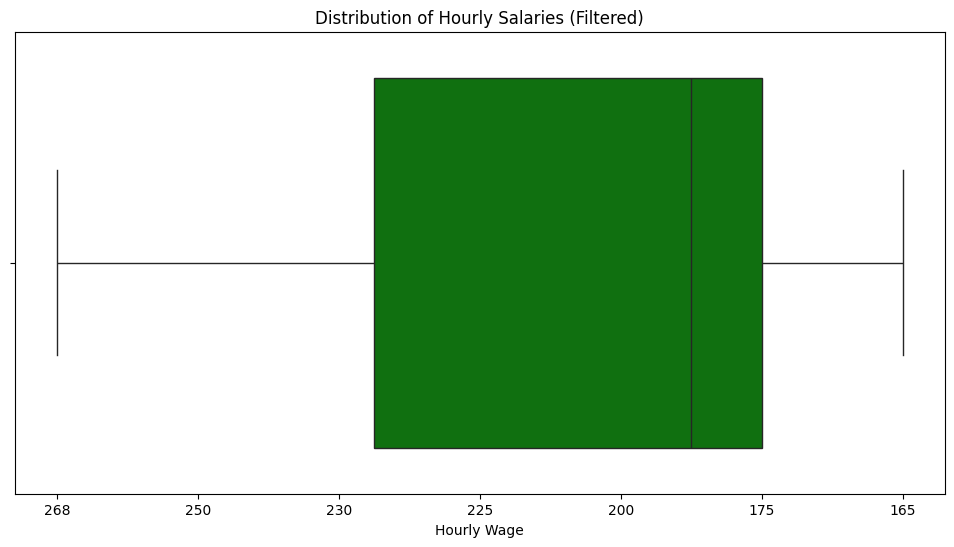

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Create a Box Plot for Annual Salaries
sns.boxplot(x=annual_salaries["salary_high"], color="blue")
plt.title("Distribution of Annual Salaries (Filtered)")
plt.xlabel("Salary")
plt.show()

plt.figure(figsize=(12, 6))

# Create a Box Plot for Hourly Salaries
sns.boxplot(x=hourly_salaries["salary_high"], color="green")
plt.title("Distribution of Hourly Salaries (Filtered)")
plt.xlabel("Hourly Wage")
plt.show()

####'Salary_Range' One Hot Encoding Model

In [ ]:
job_desc_df = pd.read_csv('/content/drive/Shareddrives/Project 2/Copy of cleaned_fake_job_postings.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


One Hot Encoding Model that states job levels based on realistic salary pay

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Define industry-based expected salary ranges
expected_salary_ranges = {
    "Intern": "Intern",
    "Entry Level": "Entry_Level",
    "Mid-Level": "Mid_Level",
    "Senior": "Senior",
    "Executive": "Executive",
}

# Function to assign salary category based on job title
def assign_salary_category(title):
    """Assigns a salary category based on job title."""
    title_lower = str(title).lower()
    for level in expected_salary_ranges.keys():
        if level.lower() in title_lower:
            return expected_salary_ranges[level]
    return "Other"  # Default category if no match

# Apply function to create salary categories
job_desc_df["salary_category"] = job_desc_df["title"].apply(assign_salary_category)

# Initialize OneHotEncoder
# Replacing 'sparse' with 'sparse_output' for compatibility with older versions of scikit-learn
encoder = OneHotEncoder(sparse_output=False, drop="first")  # Drop first column to avoid multicollinearity

# Transform salary categories into one-hot encoded matrix
encoded_salary = encoder.fit_transform(job_desc_df[["salary_category"]])

# Convert to DataFrame
encoded_salary_df = pd.DataFrame(encoded_salary, columns=encoder.get_feature_names_out(["salary_category"]))

# Concatenate with the original dataset
job_desc_df_encoded = pd.concat([job_desc_df, encoded_salary_df], axis=1)

# Drop the original salary_category column after encoding
job_desc_df_encoded.drop(columns=["salary_category"], inplace=True)

# Display first few rows
job_desc_df_encoded.head()

,Unnamed: 0,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,...,Standardized_Department_Quality Assurance & Testing.1,Standardized_Department_Research & Development.1,Standardized_Department_Retail & Consumer.1,Standardized_Department_Sales.1,Standardized_Department_Technology.1,salary_category_Executive,salary_category_Intern,salary_category_Mid_Level,salary_category_Other,salary_category_Senior
0,0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Not Provided,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Not Provided,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Not Provided,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,5,Bill Review Manager,"US, FL, Fort Worth",Not Provided,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
X = job_desc_df_encoded  # Features
y = job_desc_df['salary_category']  # Replace with your target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
# Use 'fraudulent' as the target variable for linear regression
X = job_desc_df_encoded.drop(columns=['fraudulent']) # Features, exclude target
y = job_desc_df['fraudulent']  # Target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Sample data (replace with your actual job_desc_df)
data = {
    'title': ['Senior Engineer', 'Intern Analyst', 'Mid-Level Manager', 'Executive Director', 'Entry Level Developer'],
    'industry': ['Tech', 'Finance', 'Retail', 'Healthcare', 'Tech'],
    'department': ['Engineering', 'Analytics', 'Management', 'Leadership', 'Engineering'],
    'salary': [120000, 30000, 80000, 200000, 60000]  # Example target variable
}
job_desc_df = pd.DataFrame(data)

# Define industry-based expected salary ranges (in USD, as ranges)
expected_salary_ranges = {
    "Intern": "20k-40k",
    "Entry Level": "40k-70k",
    "Mid-Level": "70k-100k",
    "Senior": "100k-150k",
    "Executive": "150k+",
    "Other": "Unknown"  # Default for unmatched titles
}

# Function to assign salary range category based on job title
def assign_salary_range(title):
    """Assigns a salary range category based on job title."""
    title_lower = str(title).lower()
    for level, salary_range in expected_salary_ranges.items():
        if level.lower() in title_lower:
            return salary_range
    return expected_salary_ranges["Other"]  # Default if no match

# Apply function to create salary range categories
job_desc_df["salary_range"] = job_desc_df["title"].apply(assign_salary_range)

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Drop first to avoid multicollinearity

# Transform salary range categories into one-hot encoded matrix
encoded_salary = encoder.fit_transform(job_desc_df[["salary_range"]])

# Convert to DataFrame with meaningful column names
encoded_salary_df = pd.DataFrame(
    encoded_salary,
    columns=encoder.get_feature_names_out(["salary_range"])
)

# Concatenate with the original dataset
job_desc_df_encoded = pd.concat([job_desc_df, encoded_salary_df], axis=1)

# Optionally drop the original salary_range column after encoding
job_desc_df_encoded.drop(columns=["salary_range"], inplace=True)

# Display the first few rows
print(job_desc_df_encoded.head())

                   title    industry   department  salary  salary_range_150k+  \
0        Senior Engineer        Tech  Engineering  120000                 0.0   
1         Intern Analyst     Finance    Analytics   30000                 0.0   
2      Mid-Level Manager      Retail   Management   80000                 0.0   
3     Executive Director  Healthcare   Leadership  200000                 1.0   
4  Entry Level Developer        Tech  Engineering   60000                 0.0   

   salary_range_20k-40k  salary_range_40k-70k  salary_range_70k-100k  
0                   0.0                   0.0                    0.0  
1                   1.0                   0.0                    0.0  
2                   0.0                   0.0                    1.0  
3                   0.0                   0.0                    0.0  
4                   0.0                   1.0                    0.0  


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Features (encoded salary ranges) and target (salary)
X = job_desc_df_encoded.drop(columns=['title', 'industry', 'department', 'salary'])
y = job_desc_df_encoded['salary']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
print("R^2 Score on Test Set:", model.score(X_test, y_test))

R^2 Score on Test Set: -25.000000000000007


In [ ]:
dept_encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_dept = dept_encoder.fit_transform(job_desc_df[['department']])
encoded_dept_df = pd.DataFrame(encoded_dept, columns=dept_encoder.get_feature_names_out(['department']))
X = pd.concat([encoded_salary_df, encoded_dept_df], axis=1)

#### `requirements` Column

In [ ]:
#Changing 'NaN' values to the 'Not Provided' string
job_desc_df['requirements'] = job_desc_df['requirements'].fillna('Not Provided')

#Sanity Check
assert job_desc_df['requirements'].isna().sum() == 0, 'NaN values in `requirements` column'

#### `benefits` Column

In [ ]:
#Changing 'NaN' and other values indicating a lack of information to the 'Not Provided' string
job_desc_df['benefits'] = job_desc_df['benefits'].replace(['nan', '...'], np.nan)
job_desc_df['benefits'] = job_desc_df['benefits'].fillna('Not Provided')

#Sanity Check
assert job_desc_df['benefits'].isna().sum() == 0, 'NaN values in `benefits` column'

#### `employment_type` Column

In [ ]:
#Chaning `NaN` values to 'Not Provided'
job_desc_df['employment_type'] = job_desc_df['employment_type'].replace(['nan'], np.nan)
job_desc_df['employment_type'] = job_desc_df['employment_type'].fillna('Not Provided')

#Sanity Check
assert job_desc_df['employment_type'].isna().sum() == 0, 'NaN values in `employment_type` column'

#### `required_experience` Column

In [ ]:
#Changing values
job_desc_df['required_experience'] = job_desc_df['required_experience'].replace(['nan'], np.nan)
job_desc_df['required_experience'] = job_desc_df['required_experience'].fillna('Not Provided')
#Sanity Check
assert job_desc_df['required_experience'].isna().sum() == 0, 'NaN values in `required_experience` column'

#### `required_education` Column

In [ ]:
#Changing values
job_desc_df['required_education'] = job_desc_df['required_education'].replace(['nan'], np.nan)
job_desc_df['required_education'] = job_desc_df['required_education'].fillna('Not Provided')

#Sanity Check
assert job_desc_df['required_education'].isna().sum() == 0, 'NaN values in `required_education` column'

#### `industry` Column

In [ ]:
#Changing values
job_desc_df['industry'] = job_desc_df['industry'].replace(['nan'], np.nan)
job_desc_df['industry'] = job_desc_df['industry'].fillna('Not Provided')

#Sanity Check
assert job_desc_df['industry'].isna().sum() == 0, 'NaN values in `industry` column'

####Correlation Column

In [ ]:
# Load dataset
file_path = "/content/drive/Shareddrives/Project 2/Copy of cleaned_fake_job_postings.csv"
df = pd.read_csv(file_path)

# Selecting relevant numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include=['number']).columns

df_numerical = df[numerical_cols]

# Compute correlation matrix
corr_matrix = df_numerical.corr()

# Extract correlation with the 'fraudulent' column
fraud_correlation = corr_matrix['fraudulent'].drop('fraudulent').sort_values(ascending=False)

# Display the correlation of attributes with real job postings
print("Correlation of attributes with job authenticity (real job postings):")
print(fraud_correlation.round(2))